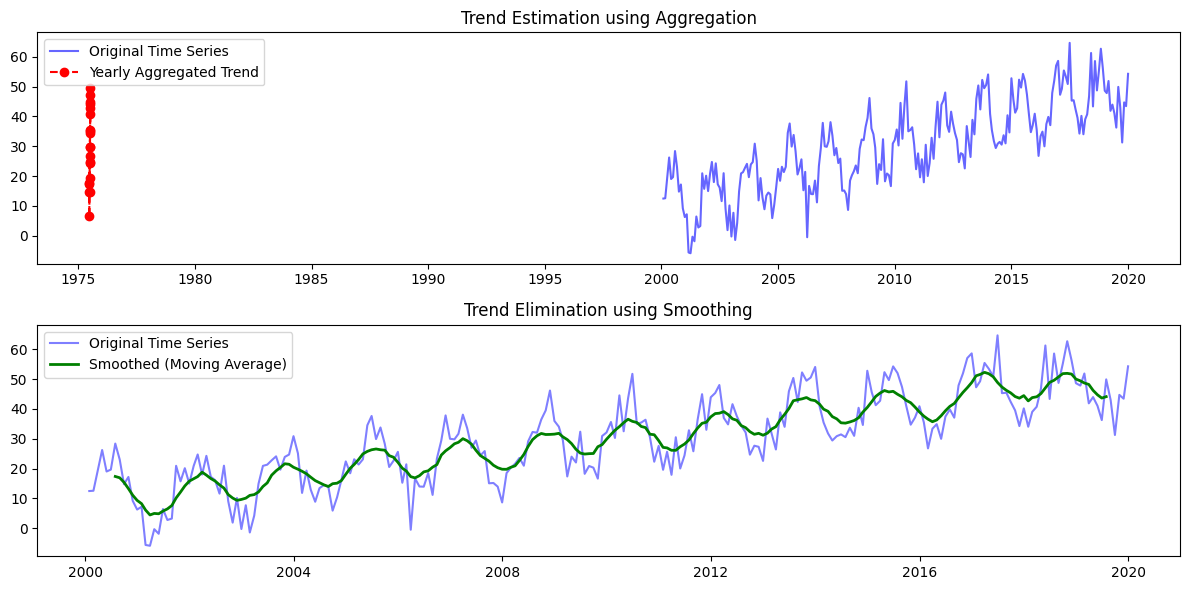

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate Synthetic Time Series Data
date_rng = pd.date_range(start='2000-01-01', periods=240, freq='ME')  # Monthly Data
np.random.seed(42)

trend = np.linspace(10, 50, 240)  # Linear increasing trend
seasonality = 10 * np.sin(np.linspace(0, 24 * np.pi, 240))  # Seasonal pattern
noise = np.random.normal(scale=5, size=240)  # Random noise

data = trend + seasonality + noise
df = pd.DataFrame({'Date': date_rng, 'Value': data})
df.set_index('Date', inplace=True)

# Step 2: Trend Estimation (Aggregation)
df['Year'] = df.index.year
df_agg = df.groupby('Year')['Value'].mean()  # Aggregating by yearly average

# Step 3: Trend Removal (Smoothing with Moving Average)
df['Smoothed'] = df['Value'].rolling(window=12, center=True).mean()  # 12-month moving average

# Step 4: Plot Results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(df.index, df['Value'], label="Original Time Series", color='blue', alpha=0.6)
plt.plot(df_agg.index, df_agg, marker='o', linestyle='dashed', color='red', label="Yearly Aggregated Trend")
plt.legend()
plt.title("Trend Estimation using Aggregation")

plt.subplot(2, 1, 2)
plt.plot(df.index, df['Value'], label="Original Time Series", color='blue', alpha=0.5)
plt.plot(df.index, df['Smoothed'], label="Smoothed (Moving Average)", color='green', linewidth=2)
plt.legend()
plt.title("Trend Elimination using Smoothing")

plt.tight_layout()
plt.show()
